In [ ]:
import math

initial_reviews = 84         
bucket_threshold = 0.505  
initial_rating = 0.94

def bucket_chance(final_reviews):
    additional_reviews = final_reviews - initial_reviews     
    num_pos_reviews = round(initial_rating * initial_reviews)  #

    def binomial_probability(n, k, p):
        return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

    possible_outcomes = []

    for future_pos_reviews in range(0, additional_reviews + 1):
        final_pos_reviews = num_pos_reviews + future_pos_reviews
        final_rating = final_pos_reviews / final_reviews

        probability = binomial_probability(
            additional_reviews, future_pos_reviews, initial_rating
        )

        possible_outcomes.append((final_rating, probability))

    total_probability = sum(prob for rating, prob in possible_outcomes if rating >= bucket_threshold)

    return total_probability


review_range = range(100, 200)  
total_prob_sum = 0  # Initialize sum of probabilities
count = 0  

for final_reviews in review_range:
    prob = bucket_chance(final_reviews)
    total_prob_sum += prob  
    count += 1  

#Calculate the average probability over the range
average_probability = total_prob_sum / count
print(f'The average probability above {bucket_threshold * 100}% for final reviews {review_range.start}-{review_range.stop - 1}: {average_probability:.4f}')


The average probability above 50.5% for final reviews 100-199: 0.9934


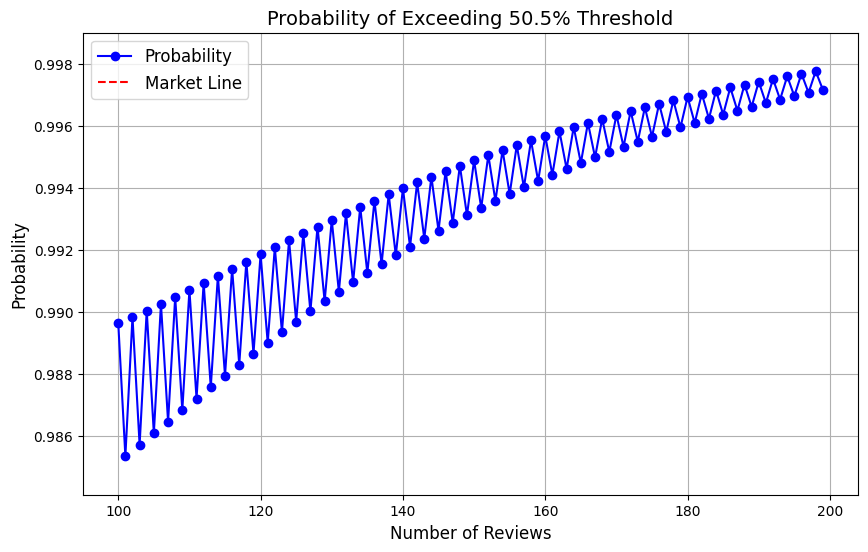

In [32]:
import matplotlib.pyplot as plt


x_values = []  
y_values = []  

for final_reviews in review_range:
    prob = bucket_chance(final_reviews)  
    x_values.append(final_reviews)
    y_values.append(prob)



plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue', label='Probability')

y_min = min(y_values)
y_max = max(y_values)
padding = 0.1 * (y_max - y_min)  # 10% of the range as padding

plt.title(f'Probability of Exceeding {bucket_threshold * 100}% Threshold', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(y_min-padding, y_max+padding)
plt.axhline(y=0.91, color='red', linestyle='--', label='Market Line')  # Reference line
plt.grid(True)
plt.legend(fontsize=12)

plt.show()


In [3]:
#Create regression model to predict review count at close

#Create model to that integrates area above price and below odds to calculate return (factoring in fees)